#### 16.04.25, &copy; Vladyslav Matkovsʹkyy KI-21-1

# Лабораторна робота #4. Імовірнісний підхід до машинного навчання. Байєсівська класифікатор

**Мета**: закріпити на практиці концепцію байєсівського вивода засобами мови Python

## Що ви будете вміти?
* Реалізовувати наївний гаусовський байєсівський класифікатор засобами мови Python
* Реалізувати узагальнену модель байєсівського класифікатора засобами мови Python

## Завдання для самостійної роботи 

1. Реалізувати наївний байєсівський класифікатор для свого варіанта (І завдання).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Дані варіанта 8
x_train_8 = np.array([
    [13, 17],
    [14, 37],
    [6, 40],
    [11, 40],
    [10, 9],
    [11, 32],
    [49, 46],
    [24, 24],
    [14, 42],
    [21, 13]
])
y_train_8 = np.array([-1, -1, 1, -1, 1, 1, 1, 1, 1, 1])

# Обчислення середнього (mean) і дисперсії (variance) для кожного класу
mw1, ml1 = np.mean(x_train_8[y_train_8 == 1], axis=0)
mw_1, ml_1 = np.mean(x_train_8[y_train_8 == -1], axis=0)

sw1, sl1 = np.var(x_train_8[y_train_8 == 1], axis=0)
sw_1, sl_1 = np.var(x_train_8[y_train_8 == -1], axis=0)

print('Mean for class 1:', mw1, ml1)
print('Mean for class -1:', mw_1, ml_1)
print('Variance for class 1:', sw1, sl1)
print('Variance for class -1:', sw_1, sl_1)

# Новий приклад для класифікації
x_sample = [20, 20]

# Функції для обчислення логарифмічної ймовірності (без нормалізуючої константи)
a_minus = lambda x: -(x[0] - ml_1)**2 / (2 * sl_1) - (x[1] - mw_1)**2 / (2 * sw_1)
a_plus  = lambda x: -(x[0] - ml1)**2  / (2 * sl1)  - (x[1] - mw1)**2  / (2 * sw1)

# Клас з більшою лог-ймовірністю
y_pred = np.argmax([a_minus(x_sample), a_plus(x_sample)])

print('Predicted class (0 = Class -1, 1 = Class 1):', y_pred)





Mean for class 1: 19.285714285714285 29.428571428571427
Mean for class -1: 12.666666666666666 31.333333333333332
Variance for class 1: 181.0612244897959 181.10204081632654
Variance for class -1: 1.5555555555555556 104.22222222222221
Predicted class (0 = Class -1, 1 = Class 1): 1


2. Реалізувати байєсівський класифікатор, попередньо змоделювавши дані згідно параметри кластерів у відповідності до свого варіанта (ІІ завдання).
 + Змінити знак коефіцієнта кореляції одного з кластерів. Повторити експеримент з класифікації. Що відбулося? вивести результати і прокоментувати
 + Модифікувати код на випадок трьох кластерів. Змоделювати відповідні дані і візуалізувати результати. ПРодемонструвати працездатність класифікатора. 

Класифікація для двох кластерів (оригінальні параметри): 1
Score кластер 1: -6.015584220249696 Score кластер 2: -6.478956661185888


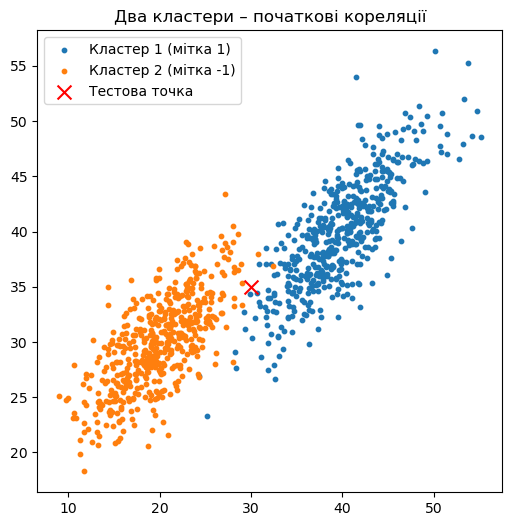

Класифікація для двох кластерів (модифікована кореляція в кластері 2): 1
Score кластер 1: -6.015584220249696 Score модифікований кластер 2: -16.401196226003016


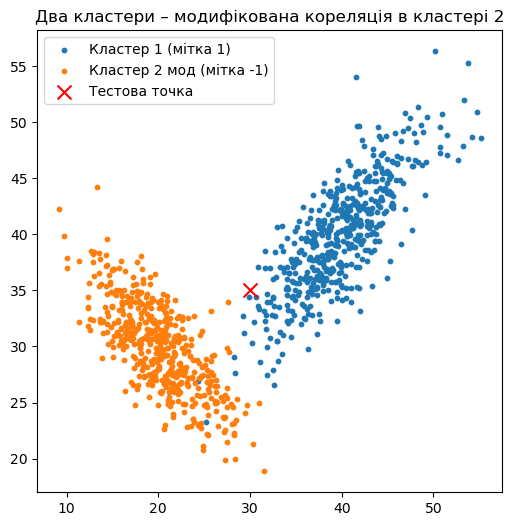

Коментар: Зміна знаку коефіцієнта кореляції для кластеру 2 призвела до перевороту еліптичного розподілу цього кластеру, що змінює його орієнтацію. Внаслідок цього може змінитися розділююча гіперплощина класифікатора, а отже – і результат класифікації тестової точки.
Класифікація для трьох кластерів: 1
Scores: Кластер 1: -6.015584220249696 Кластер 2: -6.478956661185888 Кластер 3: -18.59222752290077


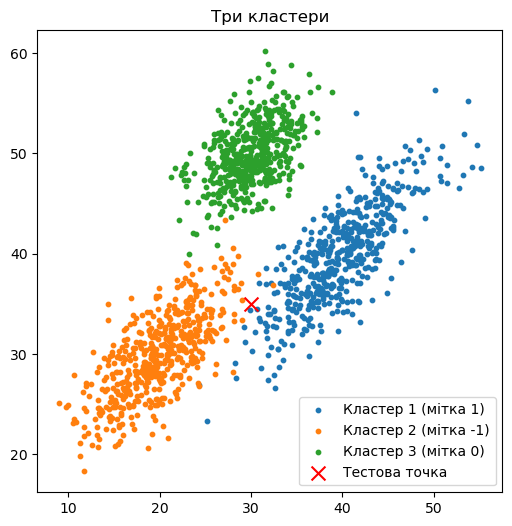

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

r1 = 0.8       
D1 = 25       
mean1 = [40, 40]
V1 = [[D1, D1 * r1],
      [D1 * r1, D1]]  

r2 = 0.7     
D2 = 16
mean2 = [20, 30]
V2 = [[D2, D2 * r2],
      [D2 * r2, D2]]   
N = 500  

data1 = np.random.multivariate_normal(mean1, V1, N)
data2 = np.random.multivariate_normal(mean2, V2, N)

mm1 = np.mean(data1, axis=0)
mm2 = np.mean(data2, axis=0)
cov1 = np.cov(data1, rowvar=False, bias=True)  
cov2 = np.cov(data2, rowvar=False, bias=True)


def bayes_score(x, cov, mean, py=0.5, L=1):
    return np.log(L * py) - 0.5 * (x - mean) @ np.linalg.inv(cov) @ (x - mean).T - 0.5 * np.log(np.linalg.det(cov))

x_test = np.array([30, 35])

score1 = bayes_score(x_test, cov1, mm1)
score2 = bayes_score(x_test, cov2, mm2)

pred_class = 1 if score1 > score2 else -1
print("Класифікація для двох кластерів (оригінальні параметри):", pred_class)
print("Score кластер 1:", score1, "Score кластер 2:", score2)

plt.figure(figsize=(6,6))
plt.scatter(data1[:, 0], data1[:, 1], s=10, label='Кластер 1 (мітка 1)')
plt.scatter(data2[:, 0], data2[:, 1], s=10, label='Кластер 2 (мітка -1)')
plt.scatter(x_test[0], x_test[1], s=100, c='red', marker='x', label='Тестова точка')
plt.title("Два кластери – початкові кореляції")
plt.legend()
plt.show()


r2_modified = -0.7 
V2_mod = [[D2, D2 * r2_modified],
          [D2 * r2_modified, D2]]

data2_mod = np.random.multivariate_normal(mean2, V2_mod, N)
mm2_mod = np.mean(data2_mod, axis=0)
cov2_mod = np.cov(data2_mod, rowvar=False, bias=True)

score2_mod = bayes_score(x_test, cov2_mod, mm2_mod)
pred_class_mod = 1 if score1 > score2_mod else -1
print("Класифікація для двох кластерів (модифікована кореляція в кластері 2):", pred_class_mod)
print("Score кластер 1:", score1, "Score модифікований кластер 2:", score2_mod)

plt.figure(figsize=(6,6))
plt.scatter(data1[:, 0], data1[:, 1], s=10, label='Кластер 1 (мітка 1)')
plt.scatter(data2_mod[:, 0], data2_mod[:, 1], s=10, label='Кластер 2 мод (мітка -1)')
plt.scatter(x_test[0], x_test[1], s=100, c='red', marker='x', label='Тестова точка')
plt.title("Два кластери – модифікована кореляція в кластері 2")
plt.legend()
plt.show()

print("Коментар: Зміна знаку коефіцієнта кореляції для кластеру 2 призвела до перевороту еліптичного розподілу цього кластеру, що змінює його орієнтацію. "
      "Внаслідок цього може змінитися розділююча гіперплощина класифікатора, а отже – і результат класифікації тестової точки.")

r3 = 0.5
D3 = 9
mean3 = [30, 50]
V3 = [[D3, D3 * r3],
      [D3 * r3, D3]]

N3 = 500
data3 = np.random.multivariate_normal(mean3, V3, N3)
mm3 = np.mean(data3, axis=0)
cov3 = np.cov(data3, rowvar=False, bias=True)

score1 = bayes_score(x_test, cov1, mm1)
score2 = bayes_score(x_test, cov2, mm2) 
score3 = bayes_score(x_test, cov3, mm3)
scores = [score1, score2, score3]
labels = [1, -1, 0]
pred_index = np.argmax(scores)
pred_label = labels[pred_index]

print("Класифікація для трьох кластерів:", pred_label)
print("Scores: Кластер 1:", score1, "Кластер 2:", score2, "Кластер 3:", score3)

plt.figure(figsize=(6,6))
plt.scatter(data1[:, 0], data1[:, 1], s=10, label='Кластер 1 (мітка 1)')
plt.scatter(data2[:, 0], data2[:, 1], s=10, label='Кластер 2 (мітка -1)')
plt.scatter(data3[:, 0], data3[:, 1], s=10, label='Кластер 3 (мітка 0)')
plt.scatter(x_test[0], x_test[1], s=100, c='red', marker='x', label='Тестова точка')
plt.title("Три кластери")
plt.legend()
plt.show()


3. Дати відповіді на контрольні запитання.

4. Відправити результати роботи у файлі lab_4_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

## Контрольні питання

1. Яка суть проблеми ймовірнісного погляду на машинне навчання в контексті логістичної регресії?

Ймовірнісний підхід у логістичній регресії

- Моделювання ймовірності: 
  Логістична регресія формує модель, яка обчислює ймовірність належності об’єкта до певного класу (зазвичай для бінарної класифікації).

- Логістична функція (sigmoid):
  Використовується для перетворення лінійної комбінації вхідних ознак у значення в інтервалі (0, 1), що інтерпретується як ймовірність.

- Лінійна залежність лог-оддів:
  Передбачається, що логарифм відношення ймовірностей (лог-оддів) є лінійною функцією вхідних даних.

- Максимізація правдоподібності:
  Параметри моделі обираються шляхом максимізації функції правдоподібності спостережуваних даних, що забезпечує найкращу відповідність моделі даним.

- Інтерпретація результатів:
  Результати дають можливість оцінити невизначеність прогнозу, адже кожне рішення супроводжується ймовірністю, що важливо для прийняття обґрунтованих рішень.


2. Як працює метод максимальної правдоподібності в логістичній регресії?

Метод максимальної правдоподібності в логістичній регресії

1. Моделювання ймовірності:
   Логістична регресія передбачає, що ймовірність належності об’єкта до класу 1 задається логістичною (sigmoid) функцією:  
   $$
   p(y=1 \mid x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_k x_k)}}
   $$

2. Формування функції правдоподібності:  
   Припускаючи незалежність спостережень, функція правдоподібності визначається як добуток умовних ймовірностей для всіх \(n\) спостережень:
   $$
   L(\beta) = \prod_{i=1}^{n} [p(y_i=1 \mid x_i)]^{y_i} [1 - p(y_i=1 \mid x_i)]^{1-y_i}
   $$

3. Логарифмічна функція правдоподібності:  
   Для спрощення оптимізації беруть натуральний логарифм функції правдоподібності, що перетворює добуток у суму:
   $$
   \ell(\beta) = \sum_{i=1}^{n} \Big( y_i \log p(y_i=1 \mid x_i) + (1-y_i) \log [1-p(y_i=1 \mid x_i)] \Big)
   $$

4. Оптимізація параметрів:  
   Знаходять такі значення параметрів \(\beta\), які максимізують логарифмічну функцію правдоподібності. Оскільки аналітичного розв’язку немає, використовують чисельні методи (наприклад, градієнтний спуск або метод Ньютона).

5. Результат:
   Отримані параметри є такими, що максимізують ймовірність спостереження даних, тобто модель найкраще описує залежність між ознаками і мітками класів.


3. Чим відрізняється багатокласова логістична регресія від бінарної?

Відмінності між багатокласовою та бінарною логістичною регресією

- Кількість класів:
  - Бінарна логістична регресія:
    Розрахована на дві категорії (наприклад, 0 та 1).
  - Багатокласова логістична регресія: 
    Призначена для задач, де кількість класів більша за два.

- Функція активації:
  - Бінарна:
    Використовує сигмоїдну функцію, яка перетворює лінійну комбінацію ознак у ймовірність класу.
  - Багатокласова:
    Застосовує функцію softmax, яка нормалізує вихідні значення для кожного класу так, щоб їх сума дорівнювала 1.

- Параметризація:
  - Бінарна:
    Модель має один набір коефіцієнтів для розрахунку лог-оддів.
  - Багатокласова: 
    Для кожного класу вводиться окремий набір коефіцієнтів (або застосовується стратегія "один проти всіх"), що дозволяє моделювати залежність для кожної категорії.


4. Що таке L2-регуляризатор і в чому сенс його використання для регуляризації моделей?

L2-регуляризатор: визначення та сенс використання

- Що таке L2-регуляризатор? 
  L2-регуляризатор (також відомий як Ridge або weight decay) — це метод, який додає до функції втрат додатковий штраф, що пропорційний сумі квадратів вагових коефіцієнтів моделі:
  $$
  \text{Penalty} = \lambda \sum_{i} w_i^2
  $$


- Сенс використання L2-регуляризатора:
  - Запобігання перенавчанню:  
    Штраф за великі значення ваг сприяє зменшенню складності моделі, що допомагає уникнути її надмірного пристосування до навчальних даних.
  - Стабільність та узагальнення: 
    Обмеження величини ваг робить модель більш стійкою до змін у даних, підвищуючи її здатність узагальнювати інформацію на нових прикладах.
  - Гладке рішення:  
    Регуляризація сприяє тому, що оптимізаційний процес шукає розв’язок з менш різкими (гладкими) параметрами, що часто призводить до покращення продуктивності моделі на тестових даних.


5. Що таке L1-регуляризатор і в чому його принципова відмінність від L2-регуляризатора?

L1-регуляризатор та його відмінність від L2-регуляризатора

- L1-регуляризатор (Lasso):  
  Додає до функції втрат штраф, пропорційний сумі абсолютних значень ваг:  
  $$
  \text{Penalty} = \lambda \sum_{i} |w_i|
  $$
  Це сприяє виникненню розрідженості (sparse) моделі, де деякі ваги можуть стати рівними нулю, що допомагає у відборі ознак.

- Принципова відмінність від L2-регуляризатора:  
  - L2-регуляризатор (Ridge):  
    Штраф пропорційний сумі квадратів ваг, що зменшує їх абсолютні значення, але рідко призводить до точного обнулення.
  - L1-регуляризатор:  
    Завдяки абсолютній нормі, має властивість "обнулювати" незначущі ваги, що дозволяє здійснювати автоматичний відбір ознак.


6. В яких випадках доцільно використовувати лінійний дискримінант Фішера?есії?

Використання лінійного дискримінанта Фішера

- Лінійна роздільність:  
  Доцільно застосовувати, коли класи розділяються приблизно лінійною межею.

- Зменшення вимірності:  
  Використовується для знаходження проекції, яка максимізує відстань між класами, що допомагає зменшити розмірність даних.

- Нормальний розподіл:  
  Ефективний, коли припущення про нормальний розподіл даних та схожість коваріаційних матриць між класами є прийнятними.

- Малі обсяги даних:  
  Простота методу робить його корисним для задач з обмеженим числом зразків.
